In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    precision_recall_curve, roc_curve, roc_auc_score)

In [2]:
data = pd.read_csv("/Users/ismaelcisse/Downloads/data.csv")

In [3]:
data

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [4]:
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [5]:
data.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [6]:
data.dtypes

Bankrupt?                                                     int64
 ROA(C) before interest and depreciation before interest    float64
 ROA(A) before interest and % after tax                     float64
 ROA(B) before interest and depreciation after tax          float64
 Operating Gross Margin                                     float64
                                                             ...   
 Liability to Equity                                        float64
 Degree of Financial Leverage (DFL)                         float64
 Interest Coverage Ratio (Interest expense to EBIT)         float64
 Net Income Flag                                              int64
 Equity to Liability                                        float64
Length: 96, dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [8]:
#No Missing Values
data.isna().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [ ]:
#data.loc[data]

In [10]:
#correlations_matrix = data.corr()
#sns.heatmap(correlations_matrix, annot=True)
#plt.show()
#X = data.drop(columns=[' Net Income Flag'])

In [28]:
X = data.drop(columns=['Bankrupt?'])
Y = data['Bankrupt?']

In [30]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train),columns=X.columns)

# we can immediately transform the X_test as well
X_test_scaled = pd.DataFrame(scaler.transform(X_test),columns=X.columns)
X_train_scaled.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,2.827554,2.278242,2.187260,0.440861,0.442325,0.036406,0.038448,0.031976,-0.012975,0.033079,...,1.888803,-0.050225,0.031109,0.441007,0.455196,-0.123010,-0.050465,-0.020965,0.0,-0.276978
1,0.455052,0.532904,0.520377,0.792269,0.794062,0.031413,0.027786,0.026979,-0.022303,0.027225,...,0.566390,-0.050225,0.014135,0.792278,0.118223,-0.324642,-0.050315,-0.019947,0.0,0.284079
2,-0.109023,0.098449,-0.093692,-0.478486,-0.477884,0.019286,0.018258,0.019066,-0.011223,0.018272,...,0.166682,-0.050225,-0.020510,-0.478290,0.099281,0.140275,-0.050271,-0.019648,0.0,-0.466948
3,-0.163090,0.010722,-0.002978,0.290954,0.287804,0.028566,0.019851,0.021539,-0.031448,0.021005,...,0.047030,-0.050225,0.006114,0.291127,0.046685,-0.083988,-0.046723,0.003072,0.0,-0.320785
4,0.325129,0.414264,0.195025,0.077266,0.078389,0.020368,0.018756,0.019196,-0.012935,0.017984,...,0.562777,-0.050225,-0.010521,0.077417,0.174216,-0.047431,-0.050465,-0.020967,0.0,-0.354777


In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=34)

<AxesSubplot:>

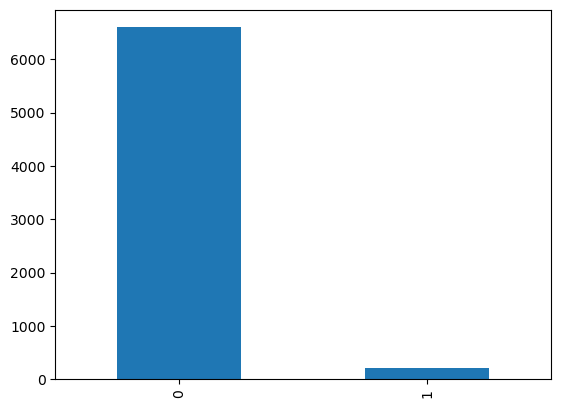

In [32]:
count_classes = data['Bankrupt?'].value_counts()
count_classes.plot(kind = 'bar')

In [35]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_scaled, Y_train)
LR.score(X_test_scaled, Y_test)

/Users/ismaelcisse/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9721407624633431

In [37]:
pred = LR.predict(X_test_scaled)

print("precision: ",precision_score(Y_test,pred))
print("recall: ",recall_score(Y_test,pred))
print("f1: ",f1_score(Y_test,pred))

precision:  0.2857142857142857
recall:  0.20689655172413793
f1:  0.24000000000000002


In [40]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, pred)

array([[1320,   15],
       [  23,    6]])

In [43]:
confusion_matrix(Y_test, pred)[1][0]

23

In [53]:
def evaluate_model(model, X_test, Y_test, results):
    pred = model.predict(X_test)
    score = model.score(X_test, Y_test)
    precision = precision_score(Y_test,pred)
    recall = recall_score(Y_test, pred)
    f1 = f1_score(Y_test, pred)
    false_negatives = confusion_matrix(Y_test, pred)[1][0]
    new_result = pd.Series([score, precision, recall, f1, false_negatives], index=results.columns)
    return results.append(new_result, ignore_index=True)

results = pd.DataFrame(columns=['accuracy','precision','recall','f1_score', 'false_negatives'])
results = evaluate_model(LR, X_test, Y_test, results)

/var/folders/fp/nkvz8km55ybd4yzr2wcb2pjr0000gn/T/ipykernel_35163/1542368058.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return results.append(new_result, ignore_index=True)


In [54]:
results

,accuracy,precision,recall,f1_score,false_negatives
0,0.862903,0.035294,0.206897,0.060302,23.0


In [15]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

RandomForestClassifier()

In [16]:
Y_pred = rf.predict(X_test)

In [18]:
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9780058651026393


In [24]:
confusion_matrix(Y_test,pred

NameError: name 'pred' is not defined

In [25]:
df = pd.DataFrame({'A': [1,2,3,4,5],'B': [1,2,3,4,5], 'C':[7,3,89,2,40]})
display(df)

,A,B,C
0,1,1,7
1,2,2,3
2,3,3,89
3,4,4,2
4,5,5,40


In [12]:
# # Create correlation matrix
#corr_matrix = df.corr().abs()
corr_X = X.corr().abs()

In [13]:
#corr_matrix
corr_X

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
Bankrupt?,1.000000,0.260807,0.282941,0.273051,0.100043,0.099445,0.000230,0.008517,0.008857,0.016593,...,0.139212,0.315457,0.035104,0.005547,0.100044,0.180987,0.166812,0.010508,0.005509,0.083048
ROA(C) before interest and depreciation before interest,0.260807,1.000000,0.940124,0.986849,0.334719,0.332755,0.035725,0.053419,0.049222,0.020501,...,0.109272,0.887670,0.071725,0.008135,0.334721,0.274287,0.143629,0.016575,0.010573,0.052416
ROA(A) before interest and % after tax,0.282941,0.940124,1.000000,0.955741,0.326969,0.324956,0.032053,0.053518,0.049474,0.029649,...,0.156890,0.961552,0.098900,0.011463,0.326971,0.291744,0.141039,0.011515,0.013372,0.057887
ROA(B) before interest and depreciation after tax,0.273051,0.986849,0.955741,1.000000,0.333749,0.331755,0.035212,0.053726,0.049952,0.022366,...,0.120680,0.912040,0.089088,0.007523,0.333750,0.280617,0.142838,0.014663,0.011473,0.056430
Operating Gross Margin,0.100043,0.334719,0.326969,0.333749,1.000000,0.999518,0.005745,0.032493,0.027175,0.051438,...,0.032930,0.300143,0.022672,0.004205,1.000000,0.075304,0.085434,0.011806,0.001167,0.120029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Net Income to Stockholder's Equity,0.180987,0.274287,0.291744,0.280617,0.075304,0.074891,0.006216,0.011343,0.010648,0.007693,...,0.192688,0.328492,0.040217,0.000127,0.075303,1.000000,0.791836,0.000093,0.005147,0.029622
Liability to Equity,0.166812,0.143629,0.141039,0.142838,0.085434,0.085407,0.001541,0.004043,0.004390,0.011899,...,0.229559,0.159697,0.021982,0.003724,0.085434,0.791836,1.000000,0.002119,0.001487,0.159654
Degree of Financial Leverage (DFL),0.010508,0.016575,0.011515,0.014663,0.011806,0.011268,0.000935,0.000855,0.000927,0.000556,...,0.001717,0.010463,0.001881,0.008812,0.011806,0.000093,0.002119,1.000000,0.016513,0.016739
Interest Coverage Ratio (Interest expense to EBIT),0.005509,0.010573,0.013372,0.011473,0.001167,0.001158,0.000393,0.000984,0.000957,0.001024,...,0.000974,0.012746,0.000239,0.001027,0.001169,0.005147,0.001487,0.016513,1.000000,0.008339


In [14]:
# # Select upper triangle of correlation matrix
#upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
#upper
###
upper_X = corr_X.where(np.triu(np.ones(corr_X.shape), k=1).astype(bool))
upper_X

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
Bankrupt?,NaN,0.260807,0.282941,0.273051,0.100043,0.099445,0.000230,0.008517,0.008857,0.016593,...,0.139212,0.315457,0.035104,0.005547,0.100044,0.180987,0.166812,0.010508,0.005509,0.083048
ROA(C) before interest and depreciation before interest,NaN,NaN,0.940124,0.986849,0.334719,0.332755,0.035725,0.053419,0.049222,0.020501,...,0.109272,0.887670,0.071725,0.008135,0.334721,0.274287,0.143629,0.016575,0.010573,0.052416
ROA(A) before interest and % after tax,NaN,NaN,NaN,0.955741,0.326969,0.324956,0.032053,0.053518,0.049474,0.029649,...,0.156890,0.961552,0.098900,0.011463,0.326971,0.291744,0.141039,0.011515,0.013372,0.057887
ROA(B) before interest and depreciation after tax,NaN,NaN,NaN,NaN,0.333749,0.331755,0.035212,0.053726,0.049952,0.022366,...,0.120680,0.912040,0.089088,0.007523,0.333750,0.280617,0.142838,0.014663,0.011473,0.056430
Operating Gross Margin,NaN,NaN,NaN,NaN,NaN,0.999518,0.005745,0.032493,0.027175,0.051438,...,0.032930,0.300143,0.022672,0.004205,1.000000,0.075304,0.085434,0.011806,0.001167,0.120029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Net Income to Stockholder's Equity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.791836,0.000093,0.005147,0.029622
Liability to Equity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002119,0.001487,0.159654
Degree of Financial Leverage (DFL),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016513,0.016739
Interest Coverage Ratio (Interest expense to EBIT),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.008339


In [37]:
# # Find features with correlation greater than 0.85
to_drop = [column for column in upper_X.columns if any(upper_X[column] > 0.85)]

In [16]:
to_drop

[' ROA(A) before interest and % after tax',
 ' ROA(B) before interest and depreciation after tax',
 ' Realized Sales Gross Margin',
 ' Pre-tax net Interest Rate',
 ' After-tax net Interest Rate',
 ' Continuous interest rate (after tax)',
 ' Net Value Per Share (A)',
 ' Net Value Per Share (C)',
 ' Operating Profit Per Share (Yuan ¥)',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' Regular Net Profit Growth Rate',
 ' Net worth/Assets',
 ' Operating profit/Paid-in capital',
 ' Net profit before tax/Paid-in capital',
 ' Operating Funds to Liability',
 ' Current Liabilities/Equity',
 ' Cash Flow to Sales',
 ' Current Liability to Liability',
 ' Current Liability to Equity',
 ' Net Income to Total Assets',
 ' Gross Profit to Sales',
 ' Liability to Equity']

In [17]:
print(f"Columns to drop: {to_drop}")
print(f"Number of columns to drop; {len(to_drop)}")

Columns to drop: [' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' Realized Sales Gross Margin', ' Pre-tax net Interest Rate', ' After-tax net Interest Rate', ' Continuous interest rate (after tax)', ' Net Value Per Share (A)', ' Net Value Per Share (C)', ' Operating Profit Per Share (Yuan ¥)', ' Per Share Net profit before tax (Yuan ¥)', ' Regular Net Profit Growth Rate', ' Net worth/Assets', ' Operating profit/Paid-in capital', ' Net profit before tax/Paid-in capital', ' Operating Funds to Liability', ' Current Liabilities/Equity', ' Cash Flow to Sales', ' Current Liability to Liability', ' Current Liability to Equity', ' Net Income to Total Assets', ' Gross Profit to Sales', ' Liability to Equity']
Number of columns to drop; 22


In [18]:
# # Drop features
X.drop(to_drop, axis=1, inplace=True)
display(X)

,Bankrupt?,ROA(C) before interest and depreciation before interest,Operating Gross Margin,Operating Profit Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),...,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Total assets to GNP price,No-credit Interval,Net Income to Stockholder's Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,1,0.370594,0.601457,0.998969,0.302646,1.256969e-04,0.000000e+00,0.458143,7.250725e-04,0.000000,...,0.520382,0.312905,0.118250,0,0.009219,0.622879,0.827890,0.026601,0.564050,0.016469
1,1,0.464291,0.610235,0.998946,0.303556,2.897851e-04,0.000000e+00,0.461867,6.470647e-04,0.000000,...,0.567101,0.314163,0.047775,0,0.008323,0.623652,0.839969,0.264577,0.570175,0.020794
2,1,0.426071,0.601450,0.998857,0.302035,2.361297e-04,2.550000e+07,0.458521,7.900790e-04,0.000000,...,0.538491,0.314515,0.025346,0,0.040003,0.623841,0.836774,0.026555,0.563706,0.016474
3,1,0.399844,0.583541,0.998700,0.303350,1.078888e-04,0.000000e+00,0.465705,4.490449e-04,0.000000,...,0.604105,0.302382,0.067250,0,0.003252,0.622929,0.834697,0.026697,0.564663,0.023982
4,1,0.465022,0.598783,0.998973,0.303475,7.890000e+09,0.000000e+00,0.462746,6.860686e-04,0.000000,...,0.578469,0.311567,0.047725,0,0.003878,0.623521,0.839973,0.024752,0.575617,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.604455,0.998992,0.303510,1.510213e-04,4.500000e+09,0.463734,1.790179e-04,0.113372,...,0.587178,0.314063,0.027951,0,0.000466,0.623620,0.840359,0.027064,0.566193,0.029890
6815,0,0.475162,0.598308,0.998992,0.303520,5.220000e+09,1.440000e+09,0.461978,2.370237e-04,0.371596,...,0.569498,0.314446,0.031470,0,0.001959,0.623931,0.840306,0.027009,0.566018,0.038284
6816,0,0.472725,0.610444,0.998984,0.303512,2.509312e-04,1.039086e-04,0.472189,0.000000e+00,0.490839,...,0.589341,0.313353,0.007542,0,0.002840,0.624156,0.840138,0.026791,0.565158,0.097649
6817,0,0.506264,0.607850,0.999074,0.303498,1.236154e-04,2.510000e+09,0.476123,2.110211e-04,0.181294,...,0.678338,0.320118,0.022916,0,0.002837,0.623957,0.841084,0.026822,0.565302,0.044009


In [27]:
corr_X = X.corr().abs()

In [28]:
corr_X

,Bankrupt?,ROA(C) before interest and depreciation before interest,Operating Gross Margin,Operating Profit Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),...,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Total assets to GNP price,No-credit Interval,Net Income to Stockholder's Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
Bankrupt?,1.000000,0.260807,0.100043,0.000230,0.016593,0.006083,0.024232,0.072356,0.023063,0.109706,...,0.115383,0.058563,0.171306,0.139212,0.035104,0.005547,0.180987,0.010508,0.005509,0.083048
ROA(C) before interest and depreciation before interest,0.260807,1.000000,0.334719,0.035725,0.020501,0.066869,0.106461,0.323482,0.048882,0.250761,...,0.504311,0.129002,0.160725,0.109272,0.071725,0.008135,0.274287,0.016575,0.010573,0.052416
Operating Gross Margin,0.100043,0.334719,1.000000,0.005745,0.051438,0.206353,0.016976,0.341188,0.017198,0.067970,...,0.226990,0.030672,0.132650,0.032930,0.022672,0.004205,0.075304,0.011806,0.001167,0.120029
Operating Profit Rate,0.000230,0.035725,0.005745,1.000000,0.592006,0.013246,0.016387,0.023051,0.002784,0.019936,...,0.026682,0.014088,0.079679,0.000295,0.003338,0.000199,0.006216,0.000935,0.000393,0.017071
Non-industry income and expenditure/revenue,0.016593,0.020501,0.051438,0.592006,1.000000,0.003597,0.006041,0.005943,0.001332,0.002270,...,0.000973,0.018515,0.084875,0.005652,0.000408,0.000637,0.007693,0.000556,0.001024,0.012293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
No-credit Interval,0.005547,0.008135,0.004205,0.000199,0.000637,0.006497,0.006838,0.013642,0.003175,0.011488,...,0.007769,0.005883,0.049342,0.023927,0.000584,1.000000,0.000127,0.008812,0.001027,0.050609
Net Income to Stockholder's Equity,0.180987,0.274287,0.075304,0.006216,0.007693,0.029733,0.021490,0.057933,0.010950,0.077920,...,0.107850,0.180666,0.070354,0.192688,0.040217,0.000127,1.000000,0.000093,0.005147,0.029622
Degree of Financial Leverage (DFL),0.010508,0.016575,0.011806,0.000935,0.000556,0.013577,0.013945,0.006348,0.007301,0.014962,...,0.003771,0.001471,0.022033,0.001717,0.001881,0.008812,0.000093,1.000000,0.016513,0.016739
Interest Coverage Ratio (Interest expense to EBIT),0.005509,0.010573,0.001167,0.000393,0.001024,0.006232,0.012160,0.001262,0.000779,0.030275,...,0.006057,0.000239,0.007652,0.000974,0.000239,0.001027,0.005147,0.016513,1.000000,0.008339


In [34]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

NameError: name 'train_test_split' is not defined

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
corr_X_scaled = scaler.fit_transform(corr_X)

In [32]:
corr_X_scaled

array([[1.00000000e+00, 2.60369386e-01, 9.95735803e-02, ...,
        1.04946686e-02, 5.50526251e-03, 8.29739016e-02],
       [2.60636639e-01, 1.00000000e+00, 3.34372248e-01, ...,
        1.65608414e-02, 1.05688666e-02, 5.23393153e-02],
       [9.98363708e-02, 3.34325982e-01, 1.00000000e+00, ...,
        1.17923500e-02, 1.16266420e-03, 1.19957683e-01],
       ...,
       [1.02810263e-02, 1.59929546e-02, 1.12904319e-02, ...,
        1.00000000e+00, 1.65094785e-02, 1.66586796e-02],
       [5.28064826e-03, 9.98767182e-03, 6.45406341e-04, ...,
        1.64996953e-02, 1.00000000e+00, 8.25849819e-03],
       [8.28376660e-02, 5.18559327e-02, 1.19569987e-01, ...,
        1.67248891e-02, 8.33513769e-03, 1.00000000e+00]])

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

[]

0       1
1       1
2       1
3       1
4       1
       ..
6814    1
6815    1
6816    1
6817    1
6818    1
Name:  Net Income Flag, Length: 6819, dtype: int64